# Sentiment Features

This notebook creates sentiment featues

In [14]:
import sys
sys.path.append('..') #to add top-level to path

import numpy as np
from modules.project_helper import TweetData
import pandas as pd
import matplotlib.pyplot as plt
from modules.text_features import SentimentFeaturesGenerator


## Load the tweets

In [15]:
tweet_data = TweetData()

## Create the sentiment features

**Four features are created:**

1) Proportion of words with negative sentiment in the tweet


2) Proportion of words with positive sentiment in the tweet

3) Proportion of words with neutral sentiment in the tweet

4) Combined Score of the tweet

In [16]:
sentiment_features = SentimentFeaturesGenerator(tweet_df=tweet_data.clean_tweets,
                                               aggregate=True)
sentiment_features.run()

## Analyze the results

The SentimentFeaturesGenerator generates two dataframes - one at the 'tweet level' and an aggregated dataframe for each day.

In [17]:
sentiment_df = sentiment_features.sentiment_df
sentiment_df_aggregate = sentiment_features.sentiment_df_aggregate

In [18]:
sentiment_df.head()

,negative_proportion,positive_proportion,neutral_proportion,combined_score,date
timestamp,,,,,
2019-11-17 19:57:12-06:00,0.062,0.058,0.880,-0.0516,2019-11-18
2019-11-17 19:56:02-06:00,0.000,0.000,0.000,0.0000,2019-11-18
2019-11-17 19:49:47-06:00,0.110,0.153,0.736,0.4767,2019-11-18
2019-11-17 19:47:32-06:00,0.000,0.000,1.000,0.0000,2019-11-18
2019-11-17 19:30:09-06:00,0.300,0.077,0.623,-0.8955,2019-11-18


In [19]:
sentiment_df_aggregate.head()

,negative_proportion_min,negative_proportion_max,negative_proportion_mean,positive_proportion_min,positive_proportion_max,positive_proportion_mean,neutral_proportion_min,neutral_proportion_max,neutral_proportion_mean,combined_score_min,combined_score_max,combined_score_mean
date,,,,,,,,,,,,
2009-05-05,0.000,0.000,0.000,0.163,0.252,0.2075,0.748,0.837,0.7925,0.4767,0.7506,0.61365
2009-05-08,0.000,0.000,0.000,0.277,0.277,0.2770,0.723,0.723,0.7230,0.6115,0.6115,0.61150
2009-05-09,0.000,0.000,0.000,0.000,0.000,0.0000,1.000,1.000,1.0000,0.0000,0.0000,0.00000
2009-05-12,0.000,0.000,0.000,0.000,0.000,0.0000,1.000,1.000,1.0000,0.0000,0.0000,0.00000
2009-05-13,0.075,0.075,0.075,0.222,0.222,0.2220,0.703,0.703,0.7030,0.4809,0.4809,0.48090


In [20]:
sentiment_df_aggregate.to_csv('../data/features/daily_sentiment.csv')


# Analyze the sentiment plots

In [21]:
sentiment_df_aggregate['month'] = sentiment_df_aggregate.index.month
sentiment_df_aggregate['year'] = sentiment_df_aggregate.index.year
sentiment_df_aggregate['YearMon'] = sentiment_df_aggregate.index.to_period('m')
sentiment_df_aggregate_month = sentiment_df_aggregate.groupby(['month','year'])['negative_proportion_max'].mean()
sentiment_df_aggregate_month = sentiment_df_aggregate\
                                .groupby(['month','year'])\
                                .agg(mean_negative_prop = pd.NamedAgg(column='negative_proportion_mean',
                                                                      aggfunc='mean'))\
                                .reset_index()
sentiment_df_aggregate_month = sentiment_df_aggregate\
                                    .groupby('YearMon')\
                                    .agg(mean_negative_prop = pd.NamedAgg(column='negative_proportion_mean',
                                                                      aggfunc='mean'),
                                         mean_combined_prop = pd.NamedAgg(column='combined_score_mean',
                                                                      aggfunc='mean')
                                        )\
                                    .reset_index()
                                                    
sentiment_df_aggregate_month['date']=pd.to_datetime({'day':1,
                'month':sentiment_df_aggregate_month.YearMon.dt.month,
                'year':sentiment_df_aggregate_month.YearMon.dt.year})

## Proportion of negative words in tweet (by month)

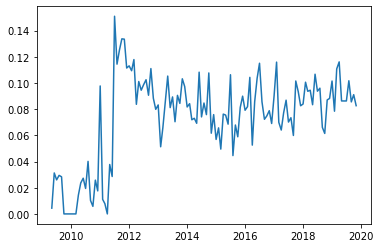

In [22]:
plt.plot(sentiment_df_aggregate_month.date,sentiment_df_aggregate_month.mean_negative_prop);

## Sentiment in tweet (by month)

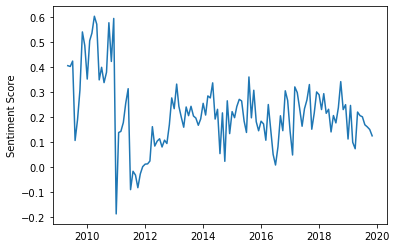

In [23]:
plt.plot(sentiment_df_aggregate_month.date,sentiment_df_aggregate_month.mean_combined_prop);
plt.ylabel('Sentiment Score');

Trump gets very negative around July, 2017. That's also when he gets political

Trump's tweet between Jan-2011 and June-2011. Most of them are apolitical.

In [24]:
tweet_data.clean_tweets[np.logical_and(tweet_data.clean_tweets.timestamp>pd.to_datetime('2011-01-01').tz_localize('US/Central'),
tweet_data.clean_tweets.timestamp<pd.to_datetime('2011-07-01').tz_localize('US/Central'))]['tweets']

timestamp
2011-06-27 15:14:33-05:00    did my weekly phoner on fox friends this morni...
2011-06-27 14:15:30-05:00    i was in san jose ca on saturday for a sit dow...
2011-06-24 20:50:54-05:00                is having an online competition vote 
2011-06-23 18:57:02-05:00    our new miss usa alyssa campanella came up to ...
2011-06-21 18:13:52-05:00    ive been visiting trump intl golf links scotla...
                                                   ...                        
2011-01-21 18:25:39-06:00    dont miss my fabulous world of golf now in its...
2011-01-21 17:20:04-06:00    busy doing phoners this week with neil cavuto ...
2011-01-13 16:14:17-06:00    dont forget to watch me tonight on late night ...
2011-01-12 19:35:05-06:00    this afternoon ill be speaking with neil cavut...
2011-01-12 15:28:31-06:00    watch me on late night with jimmy fallon tomor...
Name: tweets, Length: 95, dtype: object

Trump's tweet between July-2011. Most of them are political.

In [25]:
tweet_data.clean_tweets[np.logical_and(tweet_data.clean_tweets.timestamp>pd.to_datetime('2011-07-01').tz_localize('US/Central'),
tweet_data.clean_tweets.timestamp<pd.to_datetime('2011-08-01').tz_localize('US/Central'))]['tweets']

timestamp
2011-07-30 15:43:38-05:00    ex presidential pollster pat cadell says most ...
2011-07-30 15:16:16-05:00    we need economic growth and jobs not blue ribb...
2011-07-29 20:13:23-05:00    no taxes in boehner or reid plan important vic...
2011-07-29 19:23:41-05:00         watched sean hannity last night a great guy 
2011-07-29 19:03:19-05:00    if obama has to re fight this fight next year ...
                                                   ...                        
2011-07-06 14:38:16-05:00    congress is back time to cut cap and balance t...
2011-07-05 19:51:31-05:00    perhaps this is the kind of thinking we need i...
2011-07-05 18:12:13-05:00    tomorrow well be going to panama for the openi...
2011-07-01 16:54:25-05:00    wishing everyone a wonderful independence day ...
2011-07-01 16:44:24-05:00    please read and watch a recent trip made to tr...
Name: tweets, Length: 73, dtype: object

This shift in Trump's Twitter activity is discussed at https://theoutline.com/post/2445/trump-s-first-real-tweet-was-on-july-6-2011?zd=1&zi=blsl6n2o